My notebook is based on a socioeconomic/demographic dataset containing over 5,000 indicators tracked from the 1950s to 2023. From this, I selected 26 indicators that I consider suitable for observing correlations with infectious diseases. I also narrowed the period to 2011–2023, as Sudan split in 2011, and I find the data from this timeframe more reliable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/home/peter/Desktop/Sudan/Data/Cleaned_Demo_data.csv') 


In [3]:
df.head()

,indicator,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Urban population (% of total population),33.207000,33.346000,33.507000,33.689000,33.894000,34.121000,34.370000,34.642000,34.936000,35.253000,35.593000,35.956000,36.342000
1,Urban population growth (annual %),2.386390,2.559407,2.791169,3.250344,3.653563,3.707586,4.191405,4.276559,3.780477,3.591538,3.653954,3.716595,2.394333
2,"Tuberculosis case detection rate (%, all forms)",51.000000,49.000000,51.000000,53.000000,53.000000,61.000000,63.000000,64.000000,65.000000,60.000000,66.000000,72.000000,53.000000
3,Tuberculosis treatment success rate (% of new ...,68.000000,75.000000,82.000000,82.000000,79.000000,78.000000,80.000000,84.000000,83.000000,86.000000,88.000000,66.000000,0.000000
4,"Survival to age 65, female (% of cohort)",68.164912,68.646308,69.152068,69.794729,70.399428,70.933960,71.478444,72.041614,72.444439,71.385386,69.408518,71.884724,0.000000


The list contains three groups of indicators relevant to infectious diseases: political, populational, and hygienic. It also includes two disease incidence indicators: Malaria and Tuberculosis. Unfortunately, there appears to be no data for other diseases, such as Cholera or Dengue.

In [4]:
df. iloc[:,0] 

0              Urban population (% of total population)
1                    Urban population growth (annual %)
2       Tuberculosis case detection rate (%, all forms)
3     Tuberculosis treatment success rate (% of new ...
4              Survival to age 65, female (% of cohort)
5                Survival to age 65, male (% of cohort)
6              Rural population (% of total population)
7                    Rural population growth (annual %)
8                                     Population, total
9           Population_Median Age, as of 1 July (years)
10    Political Stability and Absence of Violence/Te...
11    People practicing open defecation (% of popula...
12    People using at least basic drinking water ser...
13    People using at least basic sanitation service...
14    People with basic handwashing facilities inclu...
15         Migration_Net Number of Migrants (thousands)
16                      Military expenditure (% of GDP)
17    Internally displaced persons, new displace

In [5]:
print(list(df.columns))

['indicator', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


The chart below shows how the indicators increase or decrease over time.

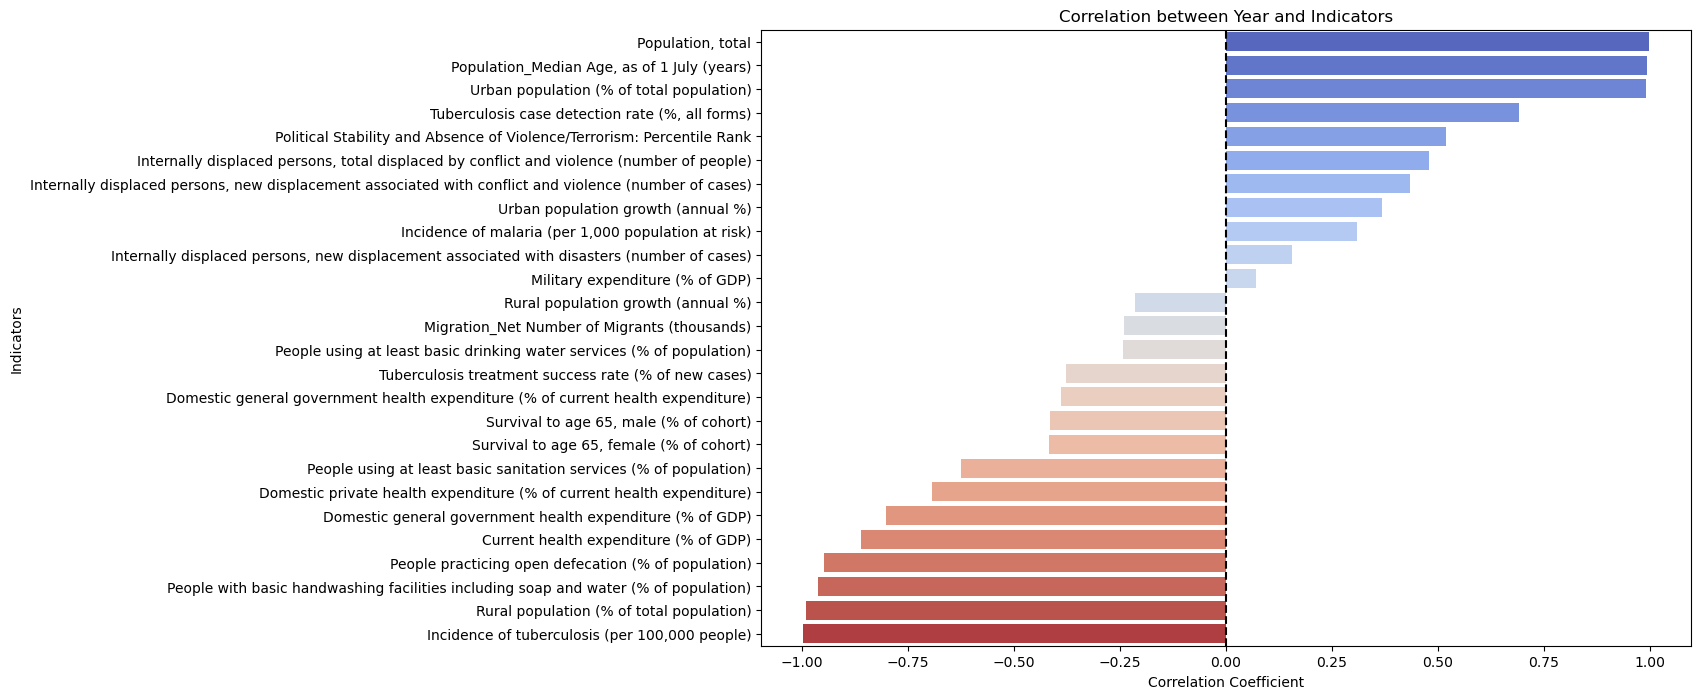

In [6]:
# Reshape the DataFrame from wide to long format
df_long = df.melt(id_vars='indicator', var_name='Year', value_name='Value')
df_long['Year'] = df_long['Year'].astype(int)  # Convert Year to integer

# Calculate correlations for each indicator with respect to Year
correlation_results = df_long.groupby('indicator').apply(lambda x: x['Value'].corr(x['Year']))

# Convert the results to a DataFrame
correlation_results = correlation_results.reset_index(name='Correlation')

# Sort the correlation results from largest to smallest
correlation_results = correlation_results.sort_values(by='Correlation', ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot of correlations
sns.barplot(data=correlation_results, x='Correlation', y='indicator', palette='coolwarm')
plt.title('Correlation between Year and Indicators')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Indicators')
plt.axvline(0, color='k', linestyle='--')
plt.show()


In [7]:
indexed_dataset = df.set_index('indicator', inplace=True)

# Transpose the DataFrame to have years as columns
transposed_data = df.transpose()

The heatmap and pair plot show correlations between disease prevalence and sanitary indicators. While several correlations appear very significant, they do not seem to prove causality. I created line plots for a closer look.

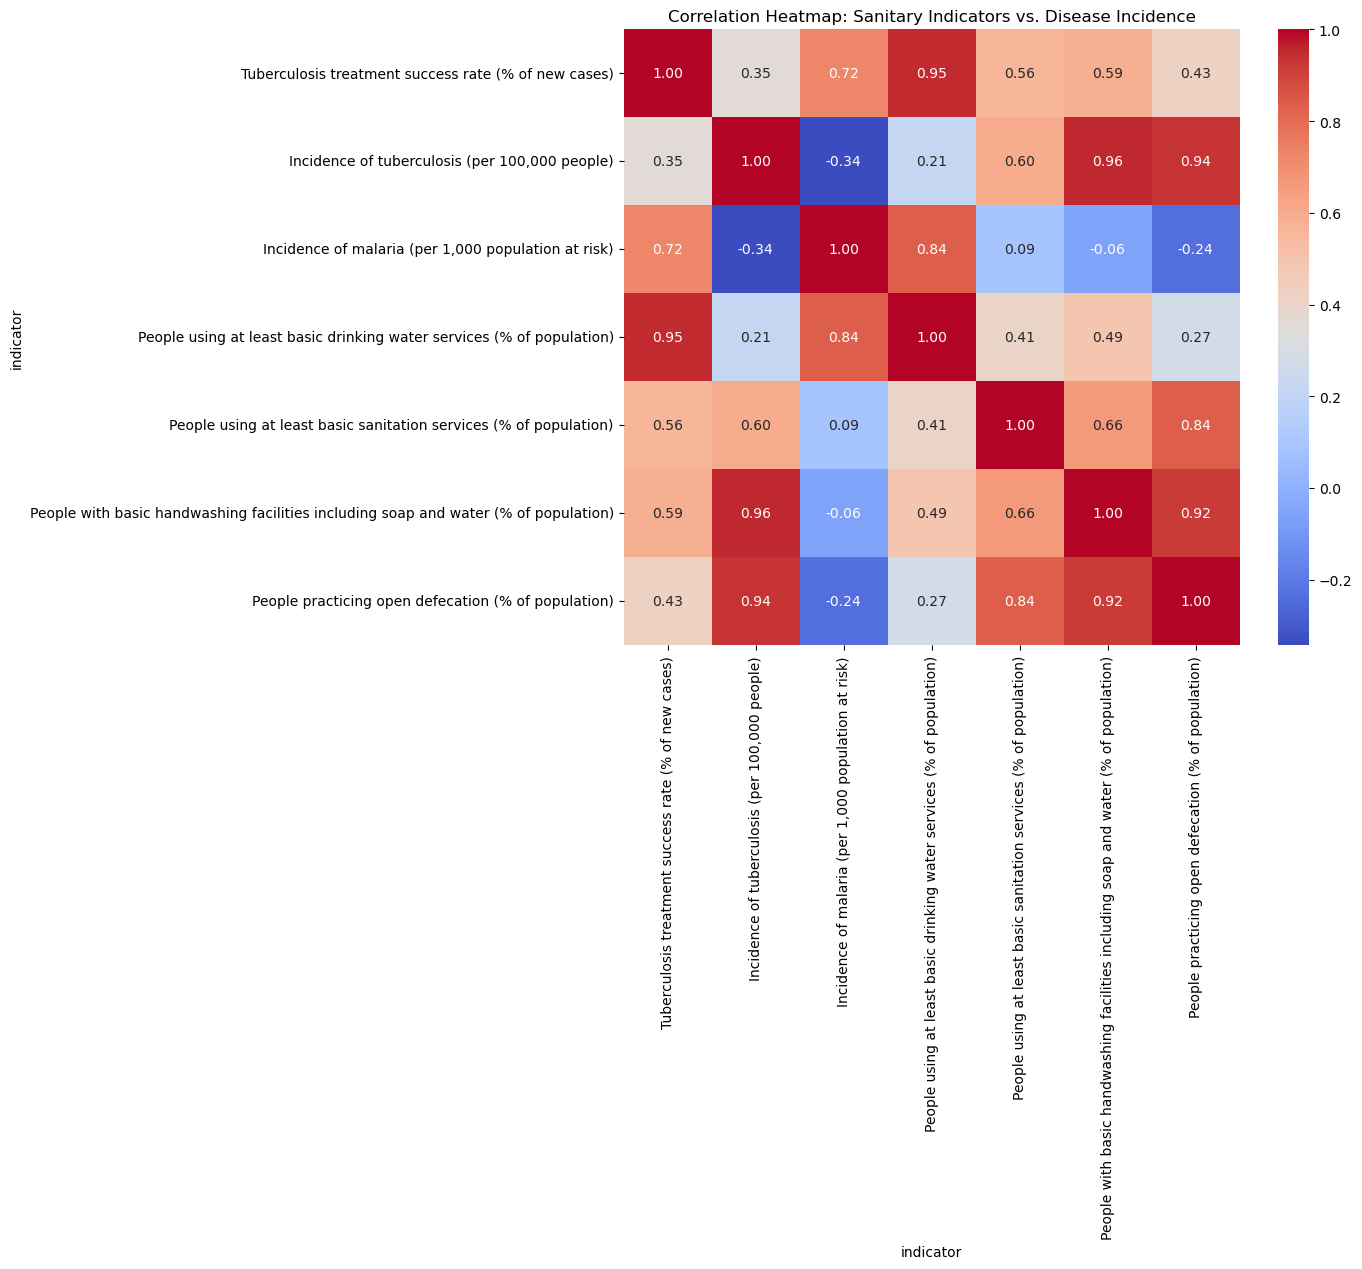

In [8]:
sanitary_indicators = [
    'Tuberculosis treatment success rate (% of new cases)',
    'Incidence of tuberculosis (per 100,000 people)',
    'Incidence of malaria (per 1,000 population at risk)',
    'People using at least basic drinking water services (% of population)',
    'People using at least basic sanitation services (% of population)',
    'People with basic handwashing facilities including soap and water (% of population)',
    'People practicing open defecation (% of population)'
]

# Filter the DataFrame to include selected indicators and all others
filtered_data = transposed_data[sanitary_indicators ]

# Calculate the correlation matrix
smaller_matrix = filtered_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))


# Draw the heatmap
sns.heatmap(smaller_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap: Sanitary Indicators vs. Disease Incidence')
plt.show()

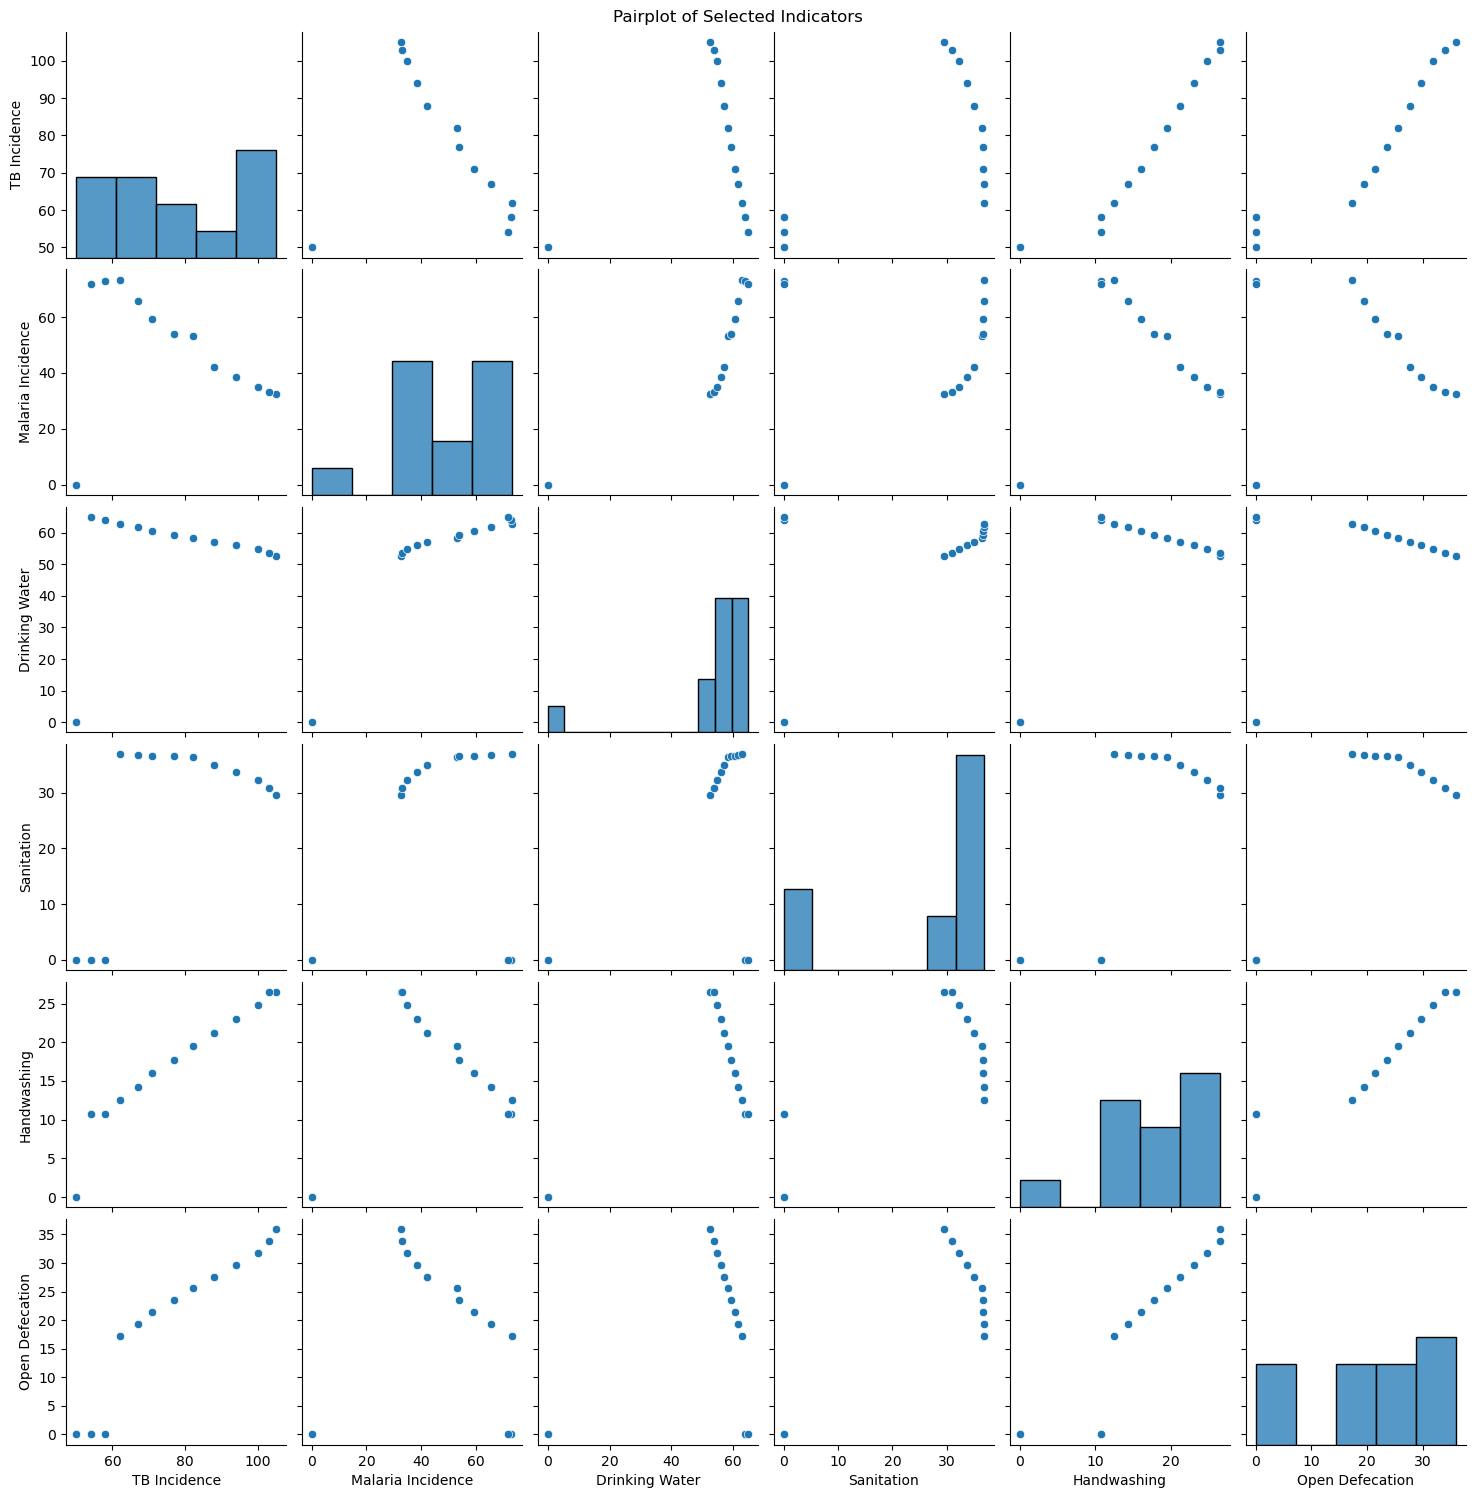

In [9]:
indicator_abbreviations = {
    'Incidence of tuberculosis (per 100,000 people)': 'TB Incidence',
    'Incidence of malaria (per 1,000 population at risk)': 'Malaria Incidence',
    'People using at least basic drinking water services (% of population)': 'Drinking Water',
    'People using at least basic sanitation services (% of population)': 'Sanitation',
    'People with basic handwashing facilities including soap and water (% of population)': 'Handwashing',
    'People practicing open defecation (% of population)': 'Open Defecation'
}

# Rename columns for brevity
filter_data = transposed_data[sanitary_indicators[1:]].rename(columns=indicator_abbreviations)

# Create the pairplot
sns.pairplot(filter_data)
plt.suptitle('Pairplot of Selected Indicators', y=1)
plt.show()


The heatmap and pair plot show potential correlations between political indicators and disease prevalence. There appears to be a strong correlation between health expenditures and tuberculosis prevalence; however, the data show no connection to malaria incidence.

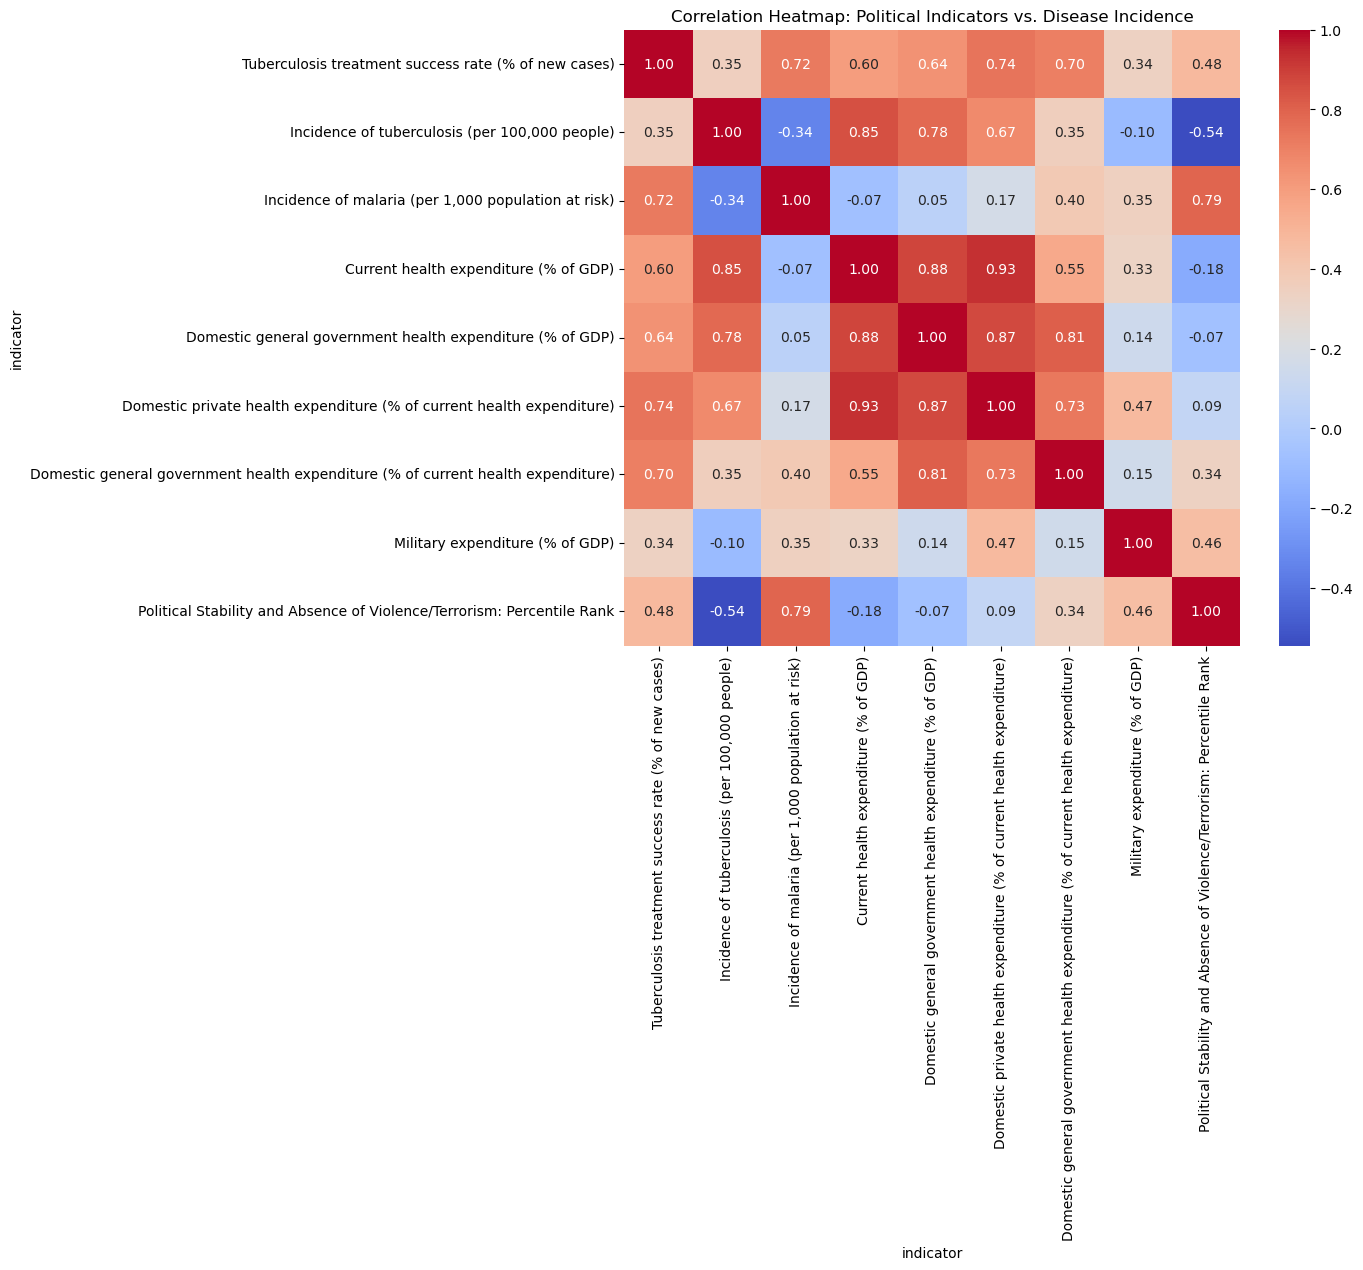

In [10]:
political_indicators = [
    'Tuberculosis treatment success rate (% of new cases)',
    'Incidence of tuberculosis (per 100,000 people)',
    'Incidence of malaria (per 1,000 population at risk)',
    'Current health expenditure (% of GDP)',
    'Domestic general government health expenditure (% of GDP)',
    'Domestic private health expenditure (% of current health expenditure)',
    'Domestic general government health expenditure (% of current health expenditure)',
    'Military expenditure (% of GDP)',
    'Political Stability and Absence of Violence/Terrorism: Percentile Rank'
]

# Filter the DataFrame to include selected indicators and all others
filtered_data = transposed_data[political_indicators ]

# Calculate the correlation matrix
smaller_matrix = filtered_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(smaller_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap: Political Indicators vs. Disease Incidence')
plt.show()

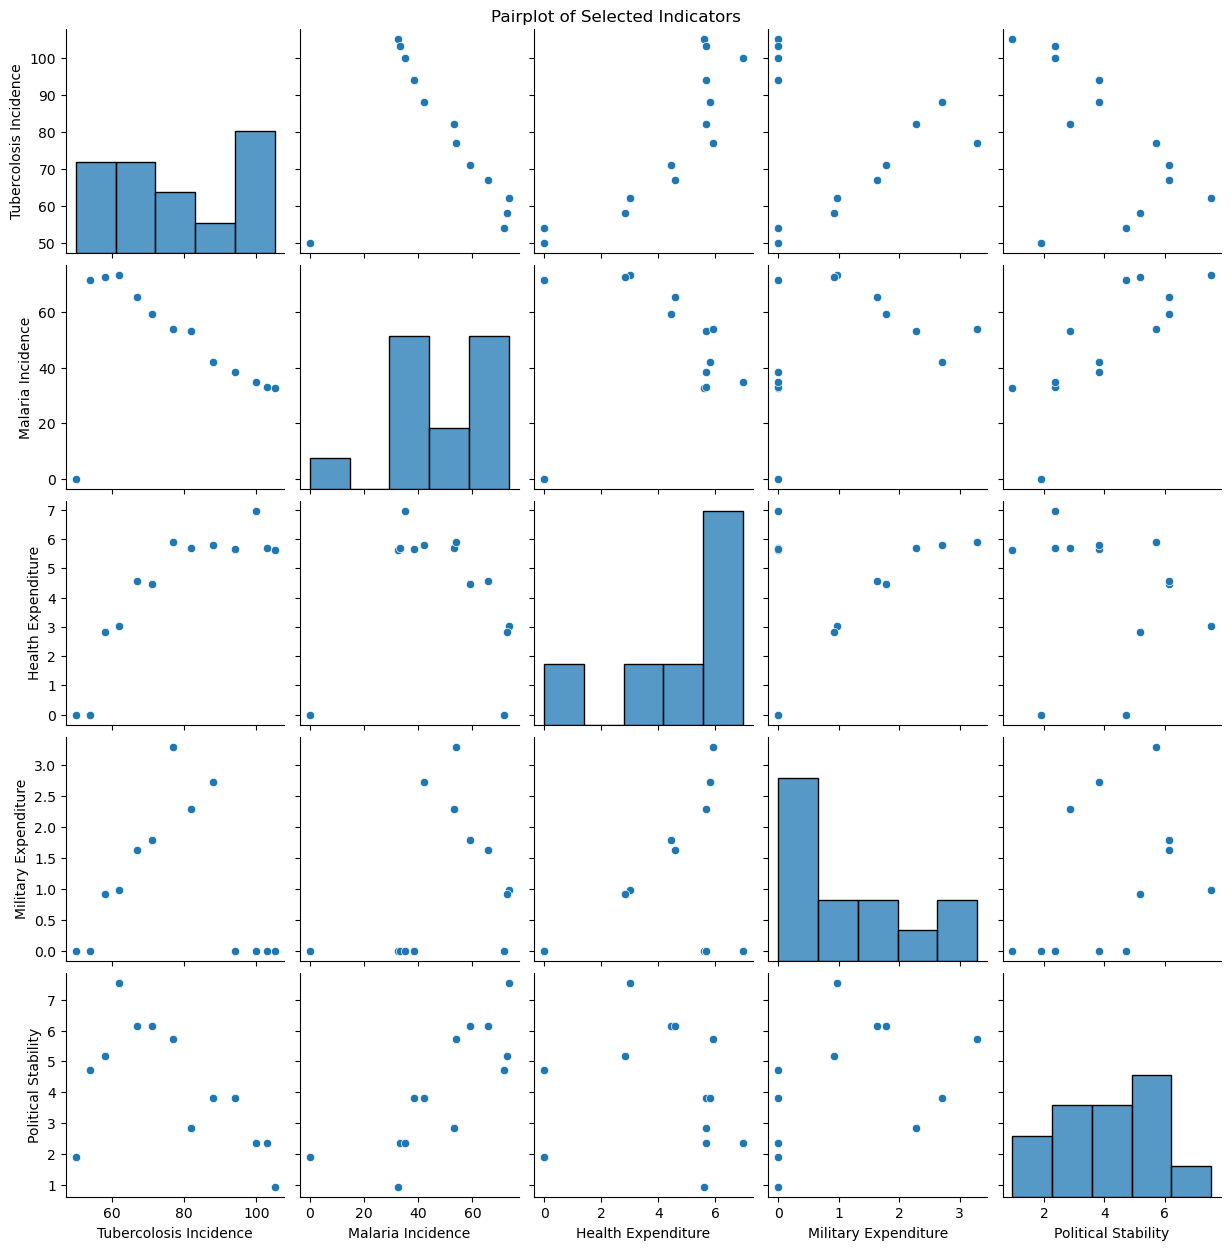

In [11]:
indicator_abbreviations = {
    'Incidence of tuberculosis (per 100,000 people)':'Tubercolosis Incidence',
    'Incidence of malaria (per 1,000 population at risk)':'Malaria Incidence',
    'Current health expenditure (% of GDP)':'Health Expenditure',
    'Military expenditure (% of GDP)':'Military Expenditure',
    'Political Stability and Absence of Violence/Terrorism: Percentile Rank':'Political Stability'
}

# Combine slices of the list
filtered_indicators = political_indicators[1:4] + political_indicators[7:]

# Filter the DataFrame
filter_data = transposed_data[filtered_indicators].rename(columns=indicator_abbreviations)

# Create the pairplot
sns.pairplot(filter_data)
plt.suptitle('Pairplot of Selected Indicators', y=1)
plt.show()


There seems to be no significant correlation between population indicators and disease prevalence.

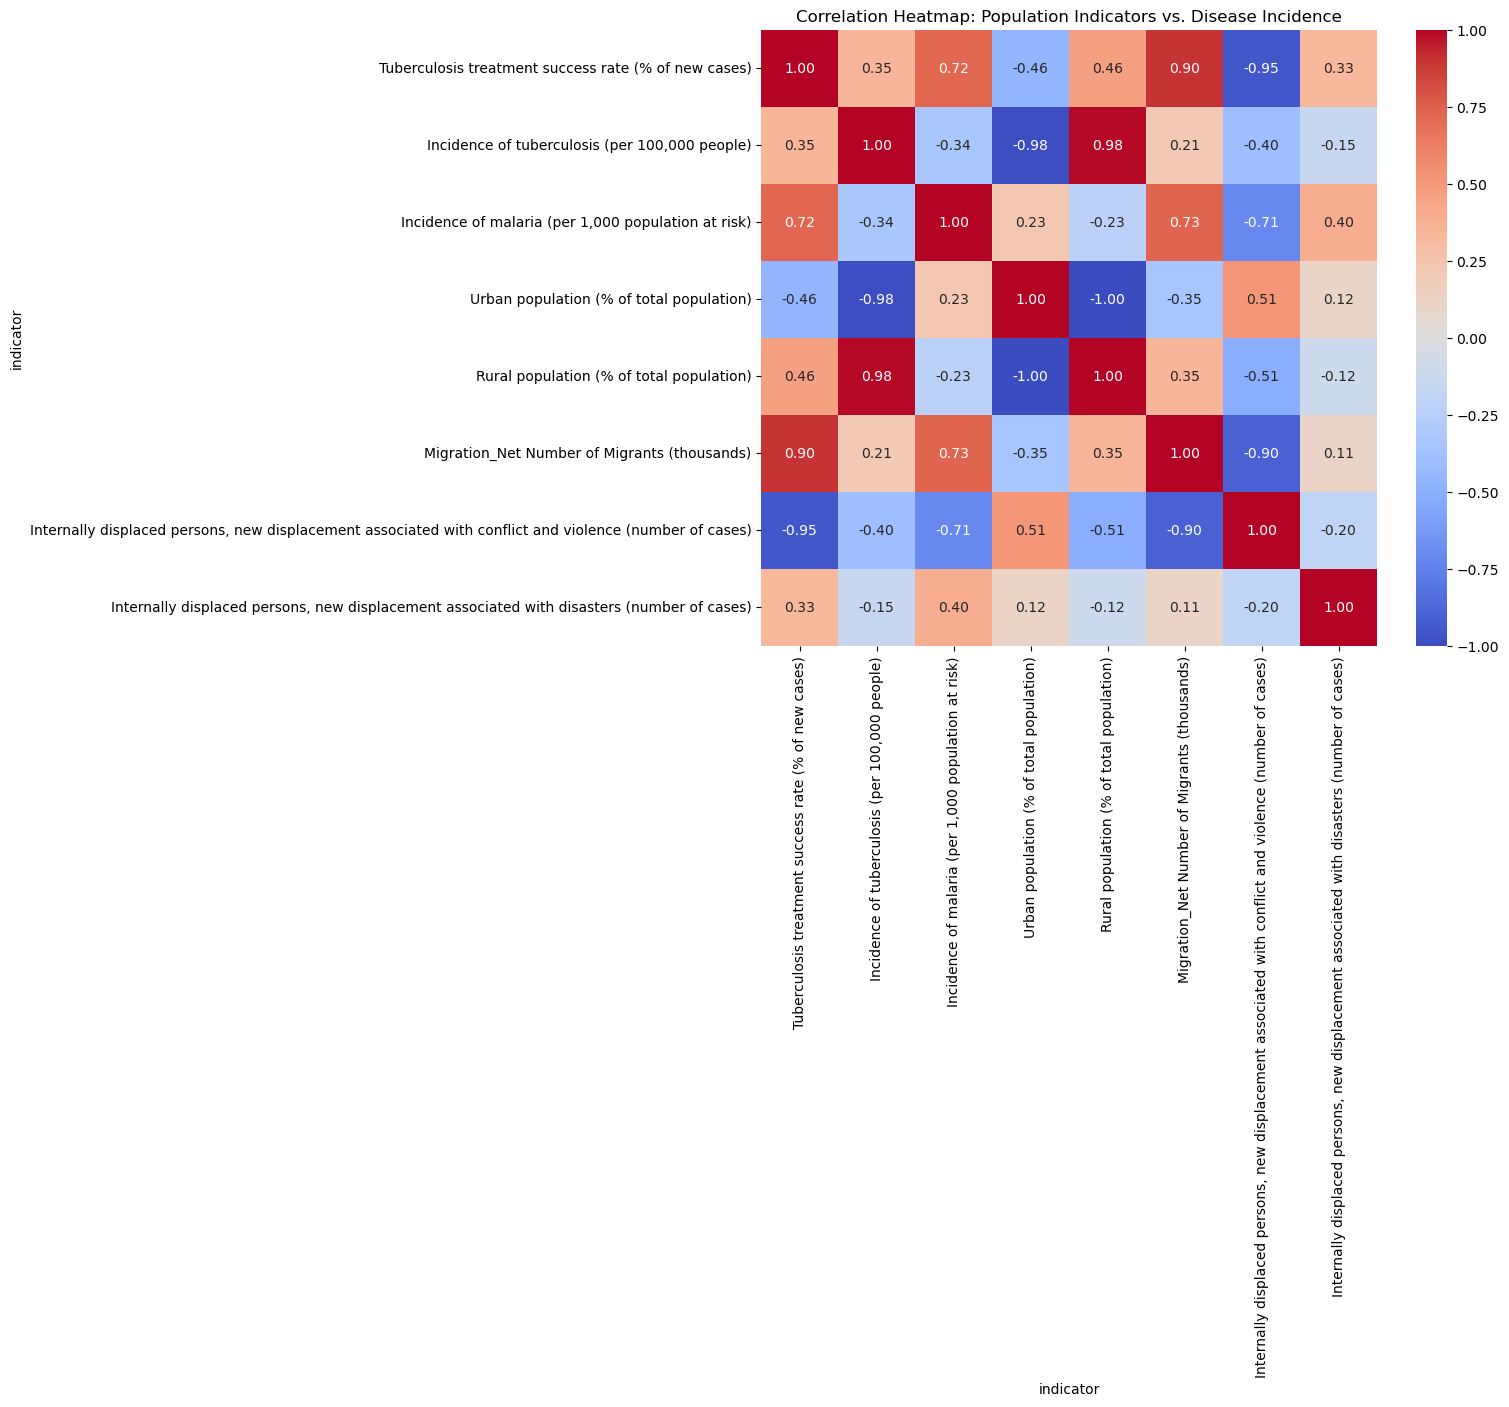

In [12]:

population_indicators = [
    'Tuberculosis treatment success rate (% of new cases)',
    'Incidence of tuberculosis (per 100,000 people)',
    'Incidence of malaria (per 1,000 population at risk)',
    'Urban population (% of total population)',
    'Rural population (% of total population)',
    'Migration_Net Number of Migrants (thousands)',
    'Internally displaced persons, new displacement associated with conflict and violence (number of cases)',
    'Internally displaced persons, new displacement associated with disasters (number of cases)'
]

# Filter the DataFrame to include selected indicators and all others
filtered_data = transposed_data[population_indicators ]

# Calculate the correlation matrix
smaller_matrix = filtered_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(smaller_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap: Population Indicators vs. Disease Incidence')
plt.show()

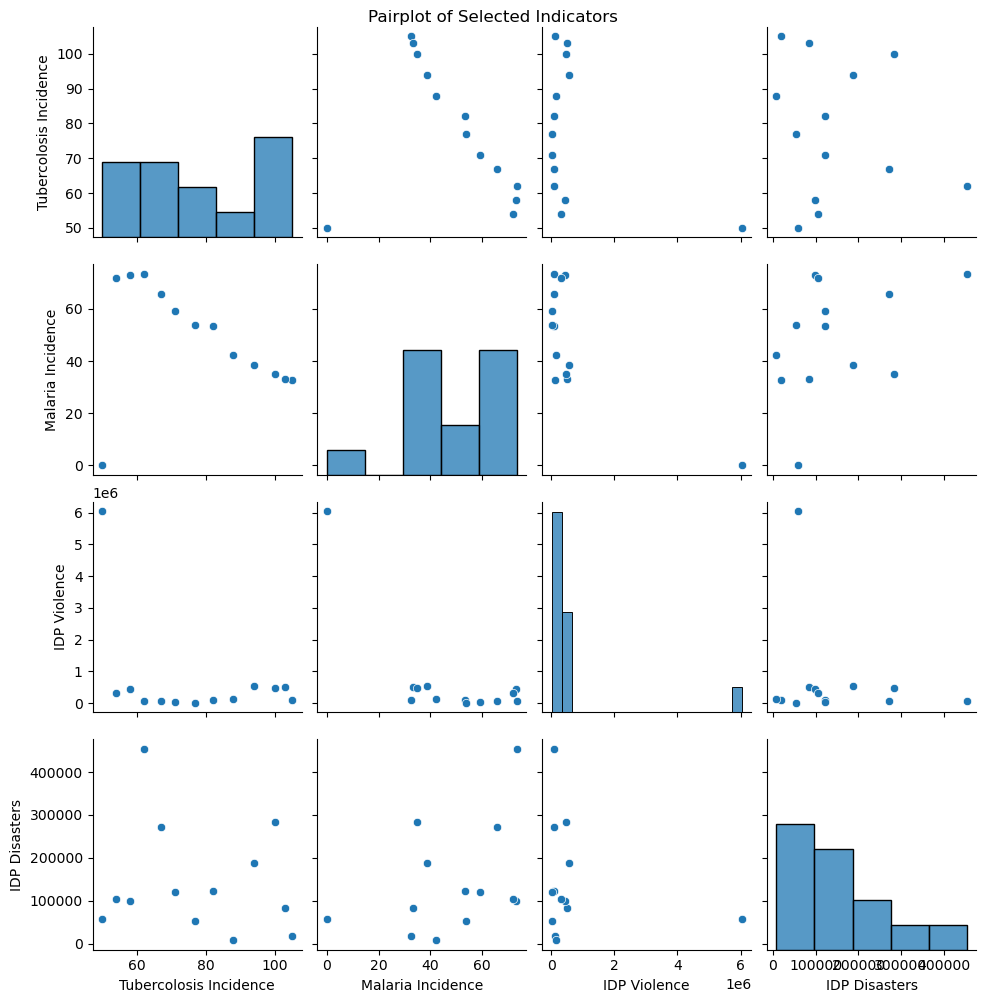

In [13]:
indicator_abbreviations = {
    'Incidence of tuberculosis (per 100,000 people)':'Tubercolosis Incidence',
    'Incidence of malaria (per 1,000 population at risk)':'Malaria Incidence',
    'Internally displaced persons, new displacement associated with conflict and violence (number of cases)':
    'IDP Violence',
    'Internally displaced persons, new displacement associated with disasters (number of cases)':
    'IDP Disasters'
}

# Combine slices of the list
filtered_indicators = population_indicators[1:3] + population_indicators[6:]

# Filter the DataFrame
filter_data = transposed_data[filtered_indicators].rename(columns=indicator_abbreviations)

# Create the pairplot
sns.pairplot(filter_data)
plt.suptitle('Pairplot of Selected Indicators', y=1)
plt.show()


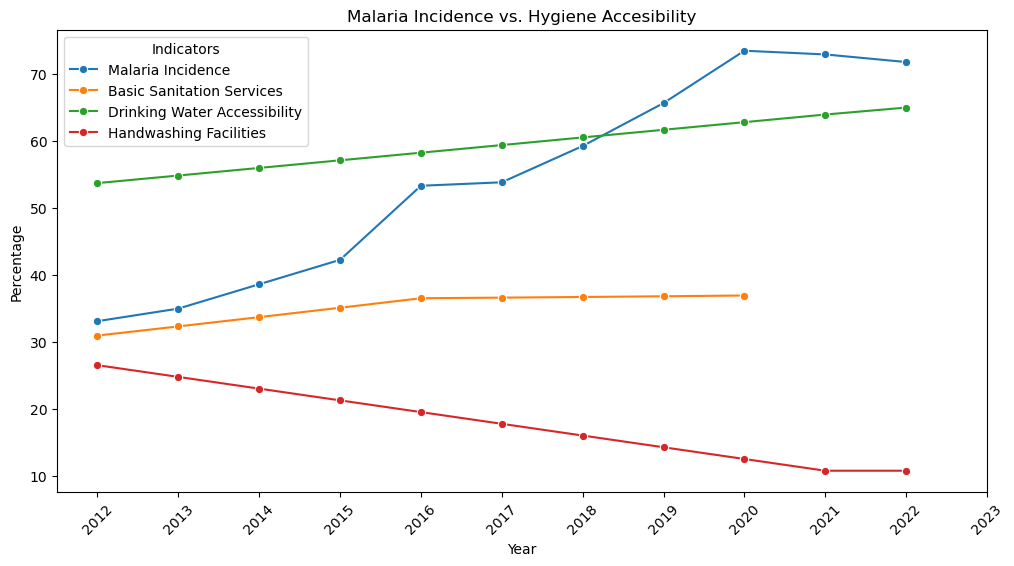

In [14]:
# Replace zeros with NaN in the DataFrame
df.replace(0, np.nan, inplace=True)

# Define the indicators and their labels
indicators = [
    ("Incidence of malaria (per 1,000 population at risk)", "Malaria Incidence"),
    ("People using at least basic sanitation services (% of population)", "Basic Sanitation Services"),
    ("People using at least basic drinking water services (% of population)", "Drinking Water Accessibility"),
    ("People with basic handwashing facilities including soap and water (% of population)", 
     "Handwashing Facilities")
]

# Extract the x-axis values (years)
years = df.columns[1:]

# Create the plot
plt.figure(figsize=(12, 6))

# Loop through indicators and plot each line
for indicator, label in indicators:
    sns.lineplot(
        x=years,
        y=df.loc[indicator].values[1:],  # Extract values for the indicator
        marker='o',
        label=label
    )

# Add title and axis labels
plt.title('Malaria Incidence vs. Hygiene Accesibility')
plt.xlabel('Year')
plt.ylabel('Percentage')

# Set x-ticks to year labels
plt.xticks(ticks=range(len(years)), labels=years, rotation=45)

# Add legend
plt.legend(title='Indicators')

# Show the plot
plt.show()


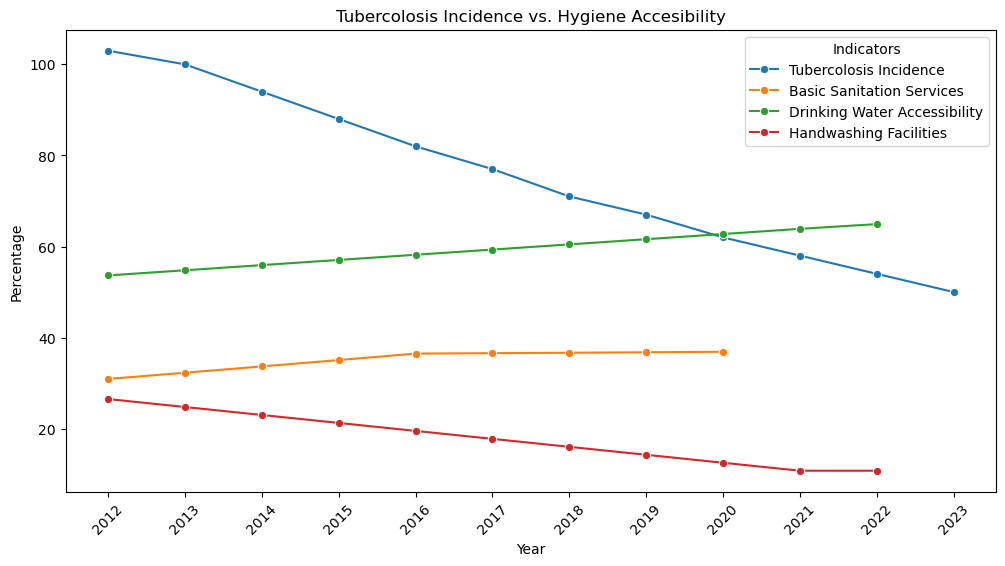

In [15]:
# Replace zeros with NaN in the DataFrame
df.replace(0, np.nan, inplace=True)

# Define the indicators and their labels
indicators = [
    ("Incidence of tuberculosis (per 100,000 people)", "Tubercolosis Incidence"),
    ("People using at least basic sanitation services (% of population)", "Basic Sanitation Services"),
    ("People using at least basic drinking water services (% of population)", "Drinking Water Accessibility"),
    ("People with basic handwashing facilities including soap and water (% of population)", 
     "Handwashing Facilities")
]

# Extract the x-axis values (years)
years = df.columns[1:]

# Create the plot
plt.figure(figsize=(12, 6))

# Loop through indicators and plot each line
for indicator, label in indicators:
    sns.lineplot(
        x=years,
        y=df.loc[indicator].values[1:],  # Extract values for the indicator
        marker='o',
        label=label
    )

# Add title and axis labels
plt.title('Tubercolosis Incidence vs. Hygiene Accesibility')
plt.xlabel('Year')
plt.ylabel('Percentage')

# Set x-ticks to year labels
plt.xticks(ticks=range(len(years)), labels=years, rotation=45)

# Add legend
plt.legend(title='Indicators')

# Show the plot
plt.show()



It looks like there might be a causal correlation between malaria incidence and healthcare expenditures

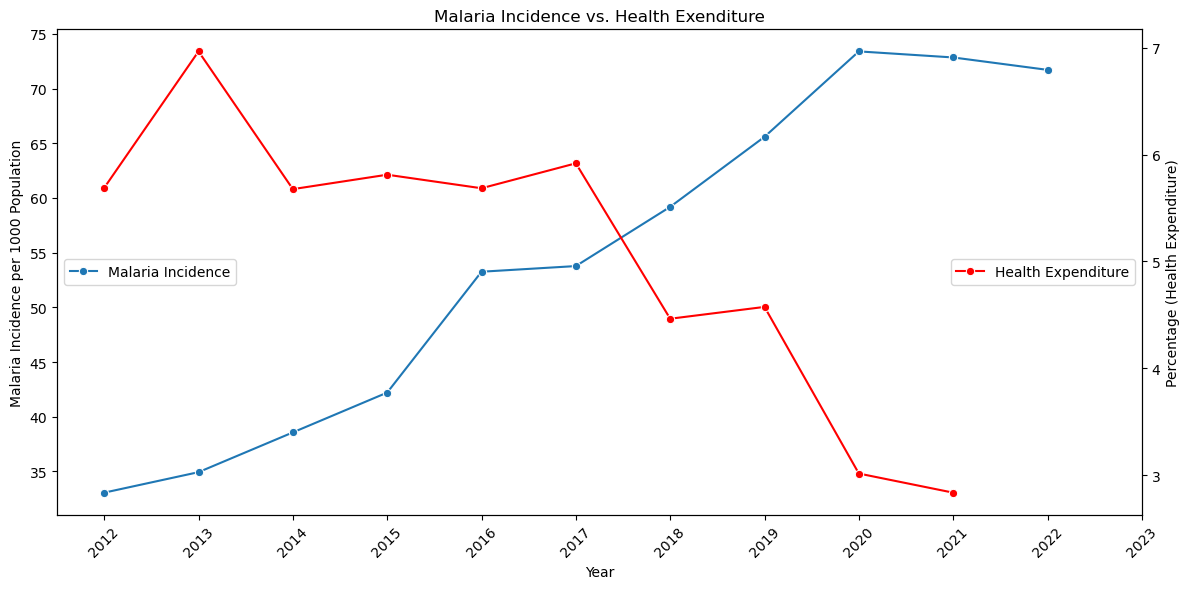

In [16]:
# Define the indicators and their labels
indicators = [
    ("Incidence of malaria (per 1,000 population at risk)", "Malaria Incidence")]

# Define the indicator for the secondary y-axis
secondary_indicator = ("Current health expenditure (% of GDP)", "Health Expenditure")

# Extract the x-axis values (years)
years = df.columns[1:]

# Create the primary plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the primary indicators
for indicator, label in indicators:
    sns.lineplot(
        ax=ax1,
        x=years,
        y=df.loc[indicator].values[1:],  # Extract values for the indicator
        marker='o',
        label=label
    )

# Customize the primary y-axis
ax1.set_ylabel('Malaria Incidence per 1000 Population')
ax1.set_xlabel('Year')
ax1.set_title('Malaria Incidence vs. Health Exenditure')
ax1.legend(loc='center left')

# Create the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(
    ax=ax2,
    x=years,
    y=df.loc[secondary_indicator[0]].values[1:],  # Extract values for the secondary indicator
    marker='o',
    label=secondary_indicator[1],
    color='red'
)

# Customize the secondary y-axis
ax2.set_ylabel('Percentage (Health Expenditure)')
ax2.tick_params(axis='y')
ax2.legend([secondary_indicator[1]], loc='center right')

# Set x-ticks to year labels
ax1.set_xticks(range(len(years)))
ax1.set_xticklabels(years, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



Reverting the y-axis for healthcare expenditures.

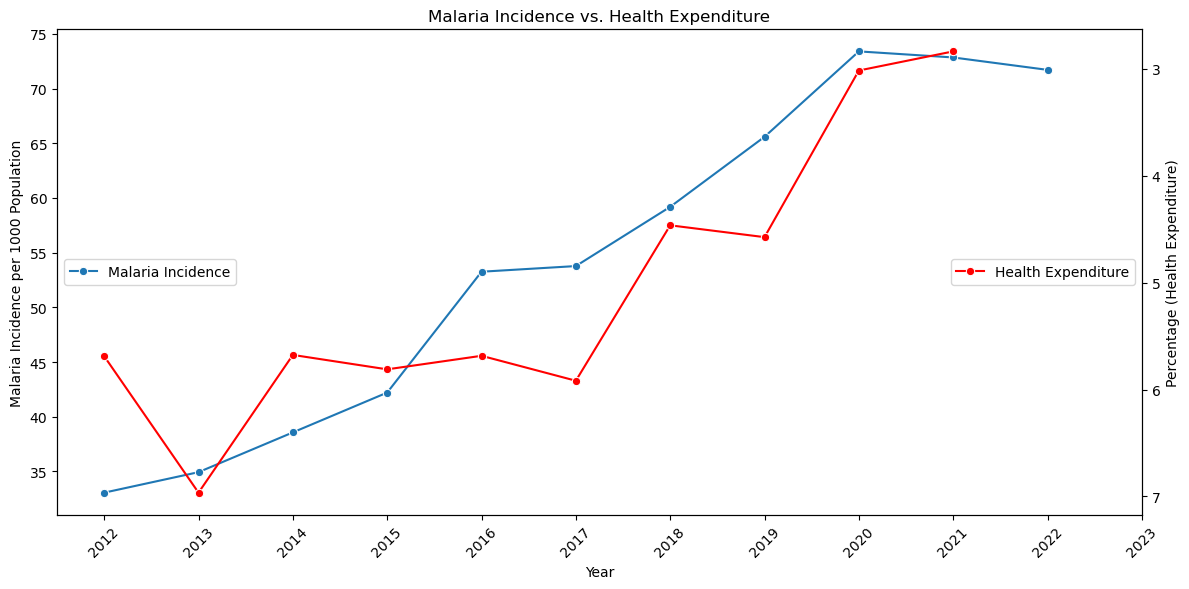

In [17]:
# Define the indicators and their labels
indicators = [
    ("Incidence of malaria (per 1,000 population at risk)", "Malaria Incidence")]

# Define the indicator for the secondary y-axis
secondary_indicator = ("Current health expenditure (% of GDP)", "Health Expenditure")

# Extract the x-axis values (years)
years = df.columns[1:]

# Create the primary plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the primary indicators
for indicator, label in indicators:
    sns.lineplot(
        ax=ax1,
        x=years,
        y=df.loc[indicator].values[1:],  # Extract values for the indicator
        marker='o',
        label=label
    )

# Customize the primary y-axis
ax1.set_ylabel('Malaria Incidence per 1000 Population')
ax1.set_xlabel('Year')
ax1.set_title('Malaria Incidence vs. Health Expenditure')
ax1.legend(loc='center left')

# Create the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(
    ax=ax2,
    x=years,
    y=df.loc[secondary_indicator[0]].values[1:],  # Extract values for the secondary indicator
    marker='o',
    label=secondary_indicator[1],
    color='red'
)

# Customize the secondary y-axis
ax2.set_ylabel('Percentage (Health Expenditure)')
ax2.tick_params(axis='y')
ax2.invert_yaxis()
ax2.legend([secondary_indicator[1]], loc='center right')

# Set x-ticks to year labels
ax1.set_xticks(range(len(years)))
ax1.set_xticklabels(years, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


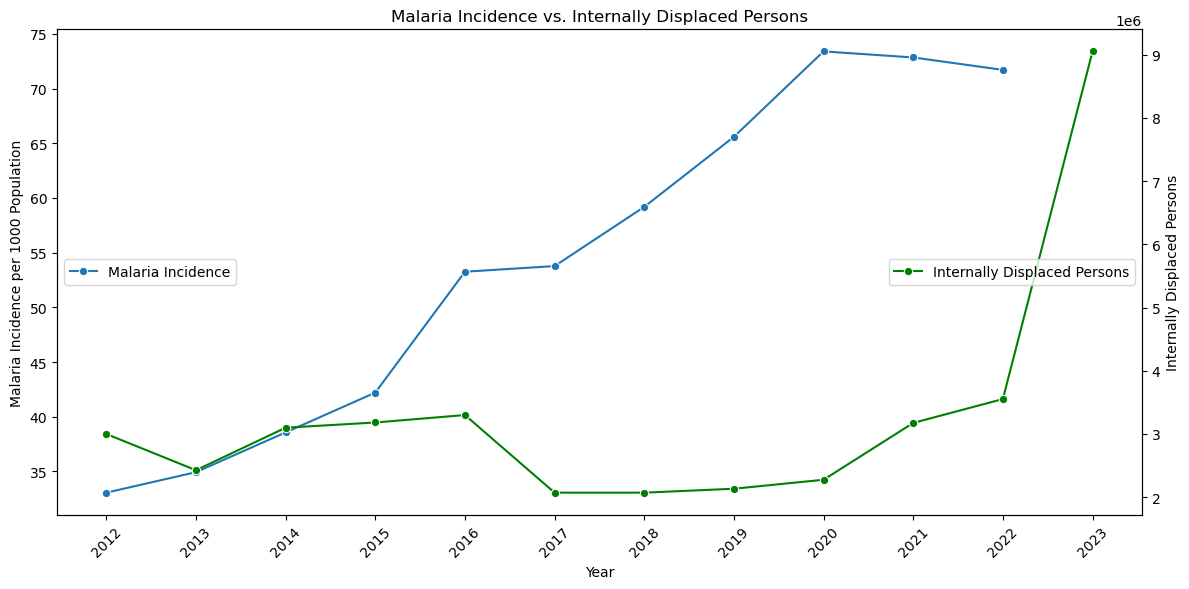

In [21]:
# Define the indicators and their labels
indicators = [
    ("Incidence of malaria (per 1,000 population at risk)", "Malaria Incidence")]

# Define the indicator for the secondary y-axis
secondary_indicator = ("Internally displaced persons, total displaced by conflict and violence (number of people)", 
                       "Internally Displaced Persons")

# Extract the x-axis values (years)
years = df.columns[1:]

# Create the primary plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the primary indicators
for indicator, label in indicators:
    sns.lineplot(
        ax=ax1,
        x=years,
        y=df.loc[indicator].values[1:],  # Extract values for the indicator
        marker='o',
        label=label
    )

# Customize the primary y-axis
ax1.set_ylabel('Malaria Incidence per 1000 Population')
ax1.set_xlabel('Year')
ax1.set_title('Malaria Incidence vs. Internally Displaced Persons')
ax1.legend(loc='center left')

# Create the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(
    ax=ax2,
    x=years,
    y=df.loc[secondary_indicator[0]].values[1:],  # Extract values for the secondary indicator
    marker='o',
    label=secondary_indicator[1],
    color='green'
)

# Customize the secondary y-axis
ax2.set_ylabel('Internally Displaced Persons')
ax2.tick_params(axis='y')
ax2.legend([secondary_indicator[1]], loc='center right')

# Set x-ticks to year labels
ax1.set_xticks(range(len(years)))
ax1.set_xticklabels(years, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Key takeaways: 
- While several significant correlations can be observed, most of them are probably not causal or don't make sense.
- Historical data for other diseases would be beneficial, especially for comparing cholera to sanitary indicators.
- The correlation between malaria incidence and healthcare expenditure looks valid.